<h3>Setup</h3>

In [1]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

<h3>Mount with Google Drive</h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Trial Project (ML)/datasets/

/content/drive/MyDrive/Trial Project (ML)/datasets


<h3>Load Dataset</h3>

In [4]:
import h5py
hf = h5py.File('datasets.h5', 'r')

In [5]:
a = np.array(hf["/X"]).astype("uint8")
b = np.array(hf["/y"]).astype("uint8")

In [6]:
print(a.shape)
print(b.shape)

(80500, 49152, 1)
(80500,)


<h3>Reshape data</h3>

In [7]:
a = a.reshape(-1, 256*192)

In [8]:
b = b - 1

In [9]:
print(a.shape)
print(b.shape)

(80500, 49152)
(80500,)


<h3>Split Data</h3>

In [ ]:
from sklearn.model_selection import train_test_split
# split the dataset twice

# split into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split (a, b, test_size = 0.20, random_state=1)

# from previous training set split into 0.6 training set and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
model = tf.keras.Sequential([
      layers.experimental.preprocessing.Rescaling(1./255),
      layers.Dense(161, input_shape=(256*192, 1), activation='sigmoid',
                   kernel_regularizer=keras.regularizers.l2(0.00003))
])

<h3>Compiling Model</h3>

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<h3>Training and Evaluating Data</h3>

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/100
189/189 [==============================] - 6s 20ms/step - loss: 4.5622 - accuracy: 0.1007 - val_loss: 3.2723 - val_accuracy: 0.2520
Epoch 2/100
189/189 [==============================] - 3s 17ms/step - loss: 2.8828 - accuracy: 0.3736 - val_loss: 2.5402 - val_accuracy: 0.4535
Epoch 3/100
189/189 [==============================] - 3s 17ms/step - loss: 2.3841 - accuracy: 0.4786 - val_loss: 2.3837 - val_accuracy: 0.4675
Epoch 4/100
189/189 [==============================] - 3s 17ms/step - loss: 2.1357 - accuracy: 0.5288 - val_loss: 2.1374 - val_accuracy: 0.5327
Epoch 5/100
189/189 [==============================] - 3s 17ms/step - loss: 1.9660 - accuracy: 0.5713 - val_loss: 2.0527 - val_accuracy: 0.5362
Epoch 6/100
189/189 [==============================] - 3s 17ms/step - loss: 1.8864 - accuracy: 0.5907 - val_loss: 1.9006 - val_accuracy: 0.5763
Epoch 7/100
189/189 [==============================] - 3s 17ms/step - loss: 1.7465 - accuracy: 0.6172 - val_loss: 1.9041 - val_accuracy:

In [ ]:
eval = model.evaluate(x=X_test, y=y_test)

504/504 [==============================] - 1s 3ms/step - loss: 1.1612 - accuracy: 0.7425


In [ ]:
eval

[1.1611751317977905, 0.742484450340271]

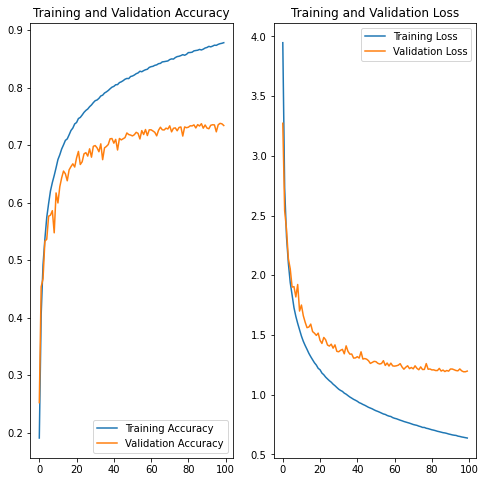

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

<h3>Use Model to Make Prediction</h3>

In [ ]:
X_new = X_test[0:10]
y_pred_new = model.predict(X_new)
print(np.argmax(y_pred_new, axis=-1))
print(y_test[0:10])

[ 37  20 101 141  66  68 103 160 121  30]
[114  20 101 141  66  34 103  95  37  30]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.88      0.70        92
           1       0.95      0.98      0.96        91
           2       0.83      0.91      0.87       100
           3       0.83      0.94      0.88        98
           4       0.88      0.97      0.92        93
           5       0.92      0.91      0.92       102
           6       0.83      0.88      0.85       103
           7       0.88      0.85      0.86        97
           8       0.73      0.82      0.77       108
           9       0.82      0.58      0.68       106
          10       0.74      0.79      0.77       111
          11       0.78      0.75      0.76        97
          12       0.51      0.61      0.56        98
          13       0.75      0.78      0.76       108
          14       0.89      0.98      0.93        87
          15       0.72      0.83      0.77        86
          16       0.80      0.66      0.72       125
  